# Task # 2 - To Explore Supervised Machine Learning

### Problem Defination :
> In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

### Data Source :
> Data can be found at  http://bit.ly/w-data

Importing relevant libraries 

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Getting the data

In [2]:
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Getting a quick description of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Getting some statistical details of the data

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


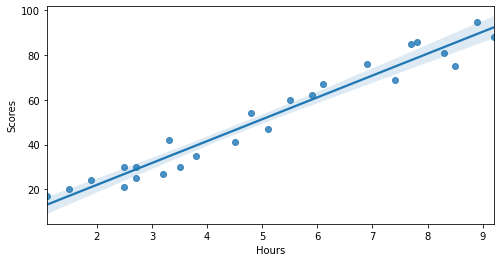

In [66]:
# Plotting a reglot inorder to check a linear relation in the data 

plt.figure(figsize=(8,4))
sns.regplot(data=df,x='Hours',y='Scores');

In [60]:
# Divide the data into inputs and labels
X = df.drop('Scores',axis=1)
y = df['Scores']

In [15]:
# Split the data into train and test sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(20, 1) (5, 1) (20,) (5,)


Model Training

In [17]:
#Training a Linear Model

linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

Generating Predictions

In [22]:
# Predcit 

y_pred = linear.predict(X_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [53]:
# Creating a data frame for actual and predicted values 

df_pred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_pred

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


Model Evaluation

In [69]:
# Evaluate How good the model performs with mean absolute error

print(mean_absolute_error(y_test,y_pred))

3.9207511902099244


In [56]:
print('Q. What will be predicted score if a student study for 9.25 hrs in a day?') 
print('Ans. ',linear.predict(np.array(9.25).reshape(-1,1))[0].round(2),'%')

Q. What will be predicted score if a student study for 9.25 hrs in a day?
Ans.  92.39 %
